In [11]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

First we need to define the mesh

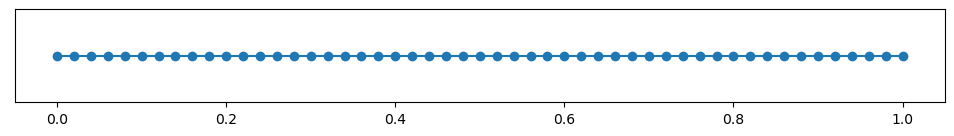

In [12]:
lx = 1
n  = 50

mesh = IntervalMesh(n, 0, lx)
plot(mesh)

 Function Space and Test Functions can be defined

In [13]:
V = FunctionSpace(mesh, 'CG',1)
u = Function(V)

In [14]:
f = Expression("x[0]*sin(x[0])", degree = 2)


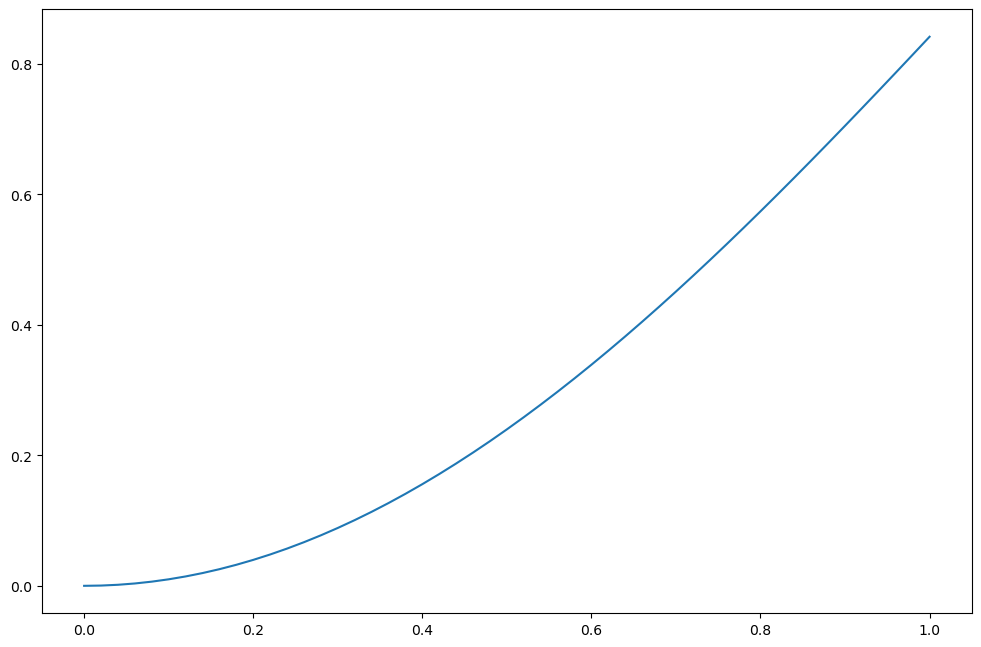

In [15]:
y = interpolate(f, V)
plot(y)

Calling FFC just-in-time (JIT) compiler, this may take some time.


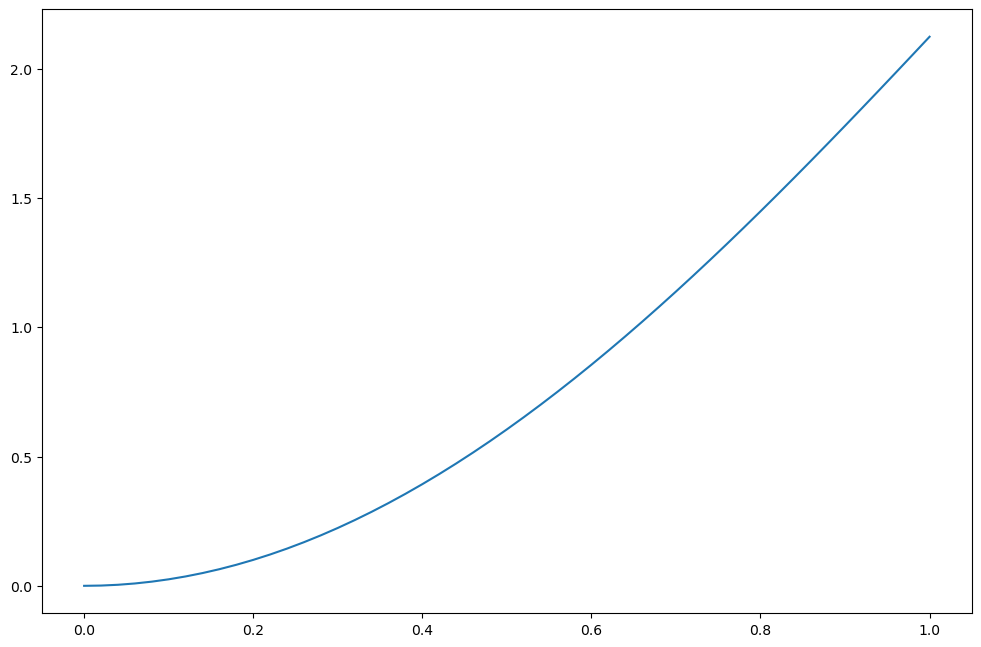

In [16]:
norm = np.sqrt(assemble(y*y*dx))
y = y/norm
plot(y)

0.9999999999999194

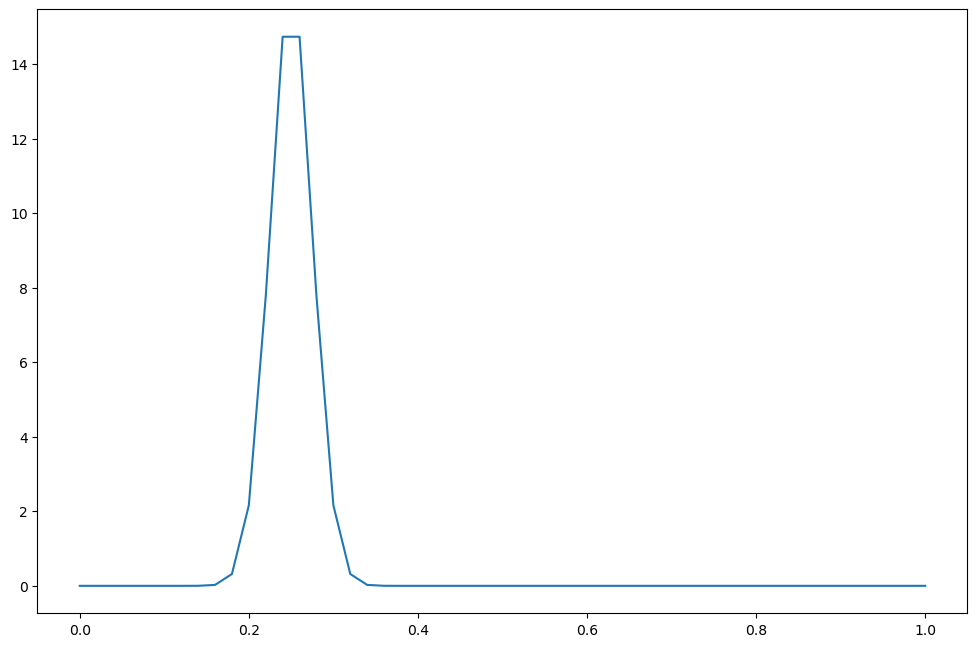

In [20]:
string_f_1d = '1 / (sigma * sqrt(2*pi)) * exp(- pow(x[0] - x_0, 2) / (2 * pow(sigma, 2)) )'

v = Expression(string_f_1d, degree=0, x_0=0.25, sigma=0.025)

g = interpolate(v,V)

plot(g)
assemble(g*dx)